# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
sinasc_1 = sinasc_raw[['SEMAGESTAC', 'CONSULTAS', 'APGAR1', 'APGAR5']].copy()
latitude = pd.cut(sinasc_raw['munResLat'], [-13.5, -10.5, 1.4], labels=['Inferior -10.5', 'Superior -10.5'])

In [5]:
# usando groupby
sinasc_1.groupby(latitude).agg({
    'SEMAGESTAC': [('máxima',np.max),
                   ('mínima',np.min), ('média',np.mean), ('desvio_padrao',np.std), ('variancia',np.var),],
    'CONSULTAS': [('máxima',np.max),
                  ('mínima',np.min), ('média',np.mean), ('desvio_padrao',np.std), ('variancia',np.var)],
    'APGAR1': [('máxima',np.max),('mediana',np.median), ('média',np.mean), ('desvio_padrao',np.std), ('variancia',np.var)],
    'APGAR5': [('mínima',np.min),('mediana',np.median), ('média',np.mean), ('desvio_padrao',np.std), ('variancia',np.var)]})

SEMAGESTAC                                           CONSULTAS  \
                   máxima mínima      média desvio_padrao variancia    máxima   
munResLat                                                                       
Inferior -10.5       45.0   19.0  38.545360      2.012435  4.049895         9   
Superior -10.5       45.0   21.0  38.588302      2.020722  4.083319         9   

                                                        APGAR1          \
               mínima     média desvio_padrao variancia máxima mediana   
munResLat                                                                
Inferior -10.5      1  3.694297      0.643372  0.413928   10.0     8.0   
Superior -10.5      1  3.467436      0.888240  0.788970   10.0     8.0   

                                                 APGAR5                    \
                   média desvio_padrao variancia mínima mediana     média   
munResLat                                                                   
Inferior -10.5  8.070216      0.960767  0.923073    0.0     9.0  9.138788   
Superior -10.5  8.199771      1.002839  1.005686    0.0     9.0  9.216551   

                                        
               desvio_padrao variancia  
munResLat                               
Inferior -10.5      0.805381  0.648638  
Superior -10.5      0.774741  0.600224

In [6]:
# usando pivot_table
sinasc_1.pivot_table(values=['SEMAGESTAC', 'CONSULTAS', 'APGAR1', 'APGAR5'],
                     index=latitude,
                     aggfunc=['min', 'max', 'mean', 'median', 'std', 'var'],
                     margins=False)

min                                max                   \
               APGAR1 APGAR5 CONSULTAS SEMAGESTAC APGAR1 APGAR5 CONSULTAS   
munResLat                                                                   
Inferior -10.5    0.0    0.0         1       19.0   10.0   10.0         9   
Superior -10.5    0.0    0.0         1       21.0   10.0   10.0         9   

                               mean            ...    median             \
               SEMAGESTAC    APGAR1    APGAR5  ... CONSULTAS SEMAGESTAC   
munResLat                                      ...                        
Inferior -10.5       45.0  8.070216  9.138788  ...         4       39.0   
Superior -10.5       45.0  8.199771  9.216551  ...         4       39.0   

                     std                                      var            \
                  APGAR1    APGAR5 CONSULTAS SEMAGESTAC    APGAR1    APGAR5   
munResLat                                                                     
Inferior -10.5  0.960767  0.805381  0.643372   2.012435  0.923073  0.648638   
Superior -10.5  1.002839  0.774741  0.888240   2.020722  1.005686  0.600224   

                                     
               CONSULTAS SEMAGESTAC  
munResLat                            
Inferior -10.5  0.413928   4.049895  
Superior -10.5  0.788970   4.083319  

[2 rows x 24 columns]

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [7]:
sinasc_2 = sinasc_raw[['QTDPARTNOR', 'QTDPARTCES']].copy()
latitude_mun = pd.cut(sinasc_raw['munResArea'], [sinasc_raw['munResArea'].min(), 3000, sinasc_raw['munResArea'].max()], labels=['Inferior 3000', 'Superior 3000'])

In [8]:
# usando groupby
sinasc_2.groupby(latitude_mun).agg({
    'QTDPARTNOR': [('máxima',np.max),
                   ('mínima',np.min), ('média',np.mean), ('desvio_padrao',np.std), ('variancia',np.var),],
    'QTDPARTCES': [('máxima',np.max),
                  ('mínima',np.min), ('média',np.mean), ('desvio_padrao',np.std), ('variancia',np.var)]})


QTDPARTNOR                                          QTDPARTCES  \
                  máxima mínima     média desvio_padrao variancia     máxima   
munResArea                                                                     
Inferior 3000       10.0    0.0  0.373255      0.856498  0.733588        5.0   
Superior 3000       41.0    0.0  0.632982      1.278932  1.635668       12.0   

                                                        
              mínima     média desvio_padrao variancia  
munResArea                                              
Inferior 3000    0.0  0.571934      0.748719  0.560580  
Superior 3000    0.0  0.507070      0.744981  0.554997

In [9]:
# usando pivot_table
sinasc_2.pivot_table(values=['QTDPARTNOR', 'QTDPARTCES'],
                     index=latitude_mun,
                     aggfunc=['min', 'max', 'mean', 'median', 'std', 'var'],
                     margins=False)

min                   max                  mean  \
              QTDPARTCES QTDPARTNOR QTDPARTCES QTDPARTNOR QTDPARTCES   
munResArea                                                             
Inferior 3000        0.0        0.0        5.0       10.0   0.571934   
Superior 3000        0.0        0.0       12.0       41.0   0.507070   

                             median                   std             \
              QTDPARTNOR QTDPARTCES QTDPARTNOR QTDPARTCES QTDPARTNOR   
munResArea                                                             
Inferior 3000   0.373255        0.0        0.0   0.748719   0.856498   
Superior 3000   0.632982        0.0        0.0   0.744981   1.278932   

                     var             
              QTDPARTCES QTDPARTNOR  
munResArea                           
Inferior 3000   0.560580   0.733588  
Superior 3000   0.554997   1.635668

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [10]:
sinasc_3 = sinasc_raw[['QTDFILVIVO', 'QTDFILMORT']].copy()
altitude = pd.cut(sinasc_raw['munResAlt'], [85.0, 100, 200], labels=['Inferior', 'Superior'])

In [11]:
# usando groupby
sinasc_3.groupby(altitude).agg({
    'QTDFILVIVO': [('máxima',np.max),
                   ('mínima',np.min), ('média',np.mean), ('desvio_padrao',np.std), ('variancia',np.var),],
    'QTDFILMORT': [('máxima',np.max),
                  ('mínima',np.min), ('média',np.mean), ('desvio_padrao',np.std), ('variancia',np.var)]})

QTDFILVIVO                                          QTDFILMORT  \
              máxima mínima     média desvio_padrao variancia     máxima   
munResAlt                                                                  
Inferior        12.0    0.0  1.170508      1.226082  1.503277        9.0   
Superior        14.0    0.0  1.023414      1.160265  1.346215        9.0   

                                                    
          mínima     média desvio_padrao variancia  
munResAlt                                           
Inferior     0.0  0.309301      0.643167  0.413664  
Superior     0.0  0.251406      0.576993  0.332921

In [12]:
# usando pivot_table
sinasc_3.pivot_table(values=['QTDFILVIVO', 'QTDFILMORT'],
                     index=altitude,
                     aggfunc=['min', 'max', 'mean', 'median', 'std', 'var'],
                     margins=False)

min                   max                  mean             \
          QTDFILMORT QTDFILVIVO QTDFILMORT QTDFILVIVO QTDFILMORT QTDFILVIVO   
munResAlt                                                                     
Inferior         0.0        0.0        9.0       12.0   0.309301   1.170508   
Superior         0.0        0.0        9.0       14.0   0.251406   1.023414   

              median                   std                   var             
          QTDFILMORT QTDFILVIVO QTDFILMORT QTDFILVIVO QTDFILMORT QTDFILVIVO  
munResAlt                                                                    
Inferior         0.0        1.0   0.643167   1.226082   0.413664   1.503277  
Superior         0.0        1.0   0.576993   1.160265   0.332921   1.346215

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [13]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

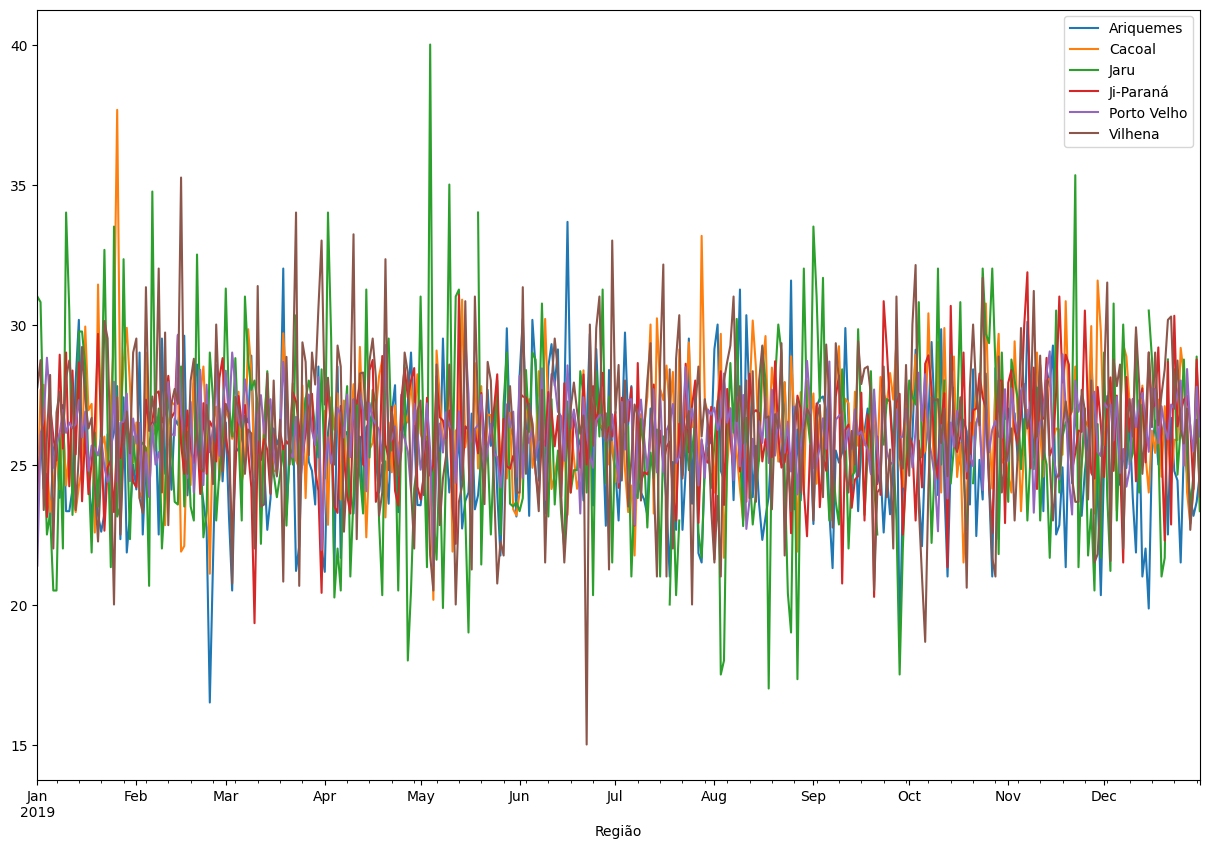

In [92]:
sinasc_plot_1 = sinasc_raw[['IDADEMAE', 'DTNASC',
                            'munResNome']].set_index('munResNome').copy()

sinasc_plot_1.loc[:,'DTNASC'] = pd.to_datetime(sinasc_plot_1['DTNASC'])
sinasc_plot_1.groupby(['DTNASC', imediatas])['IDADEMAE'].mean().unstack().plot(figsize=[15,10]);
plt.xlabel('Região');


### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.